In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./Dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354   

In [4]:
### Let's drop duplicates.
# df.drop_duplicates()

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
### Category and sex are categorical objects needed to convert numerical data.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender']= le.fit_transform(df['gender'])
df['smoking_status']= le.fit_transform(df['smoking_status'])
df['work_type']= le.fit_transform(df['work_type'])
df['ever_married']= le.fit_transform(df['ever_married'])
df['Residence_type']= le.fit_transform(df['Residence_type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int32  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int32  
 6   work_type          5110 non-null   int32  
 7   Residence_type     5110 non-null   int32  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int32  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 379.4 KB


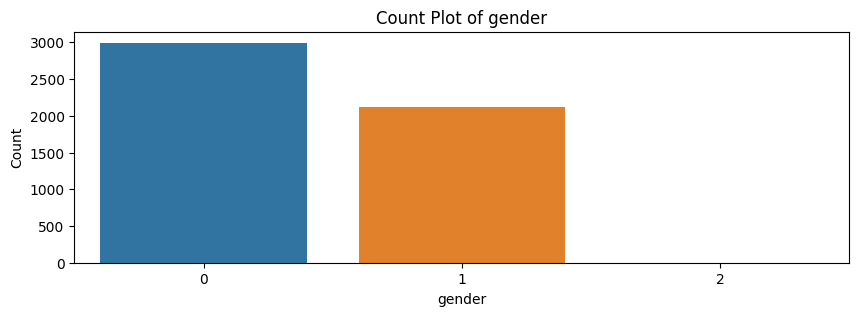

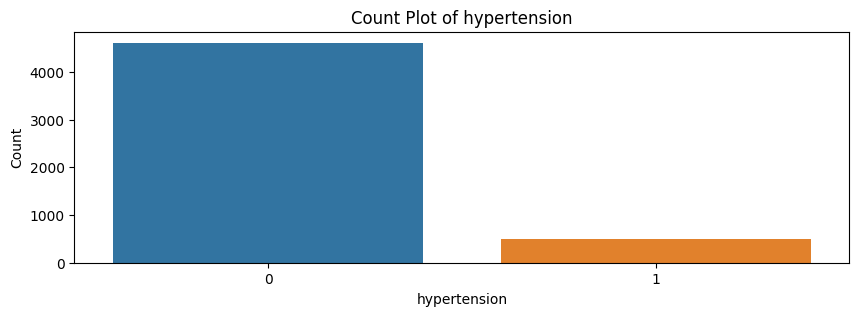

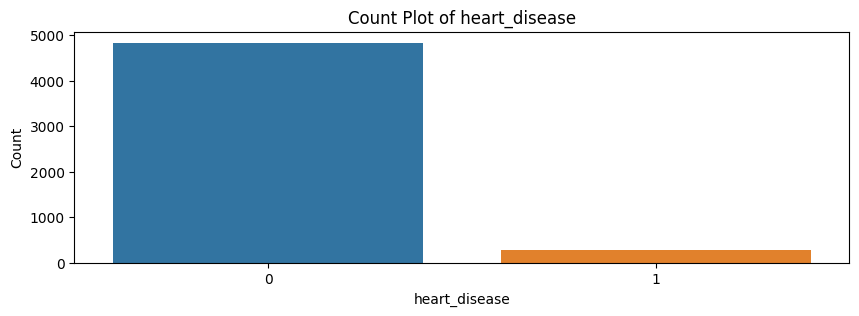

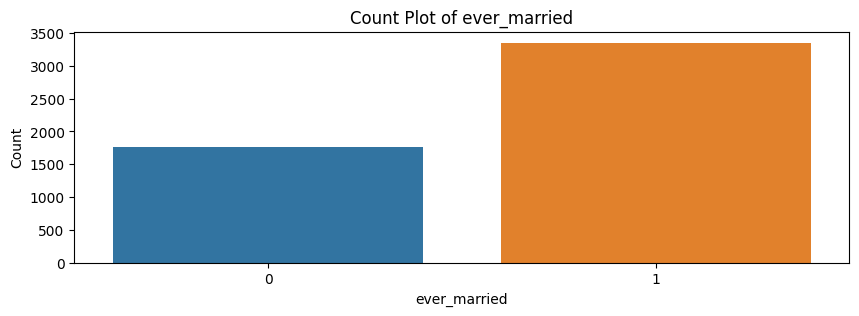

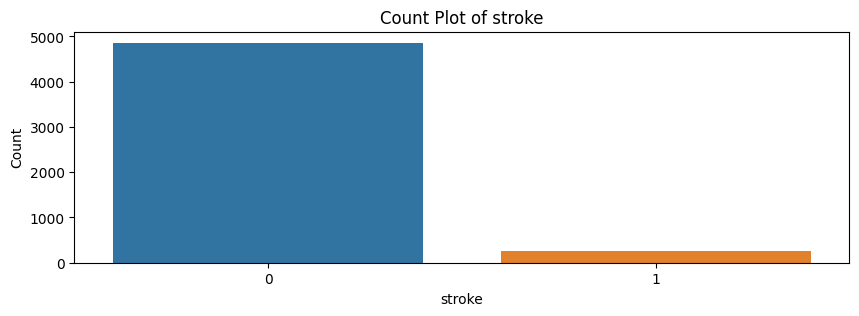

In [8]:
clms = ['gender','hypertension','heart_disease','ever_married','stroke']

for column in clms:
    plt.figure(figsize=(10,3))
    sns.countplot(x=df[column])
    plt.title(f'Count Plot of {column}')
    plt.ylabel('Count')
    plt.show()

In [9]:
corr_metrix = df.corr()
cm = corr_metrix['stroke']*100
cm

id                     0.638817
gender                 0.892887
age                   24.525735
hypertension          12.790382
heart_disease         13.491400
ever_married          10.833974
work_type             -3.231611
Residence_type         1.545797
avg_glucose_level     13.194544
bmi                    3.894660
smoking_status         2.812266
stroke               100.000000
Name: stroke, dtype: float64

<Axes: >

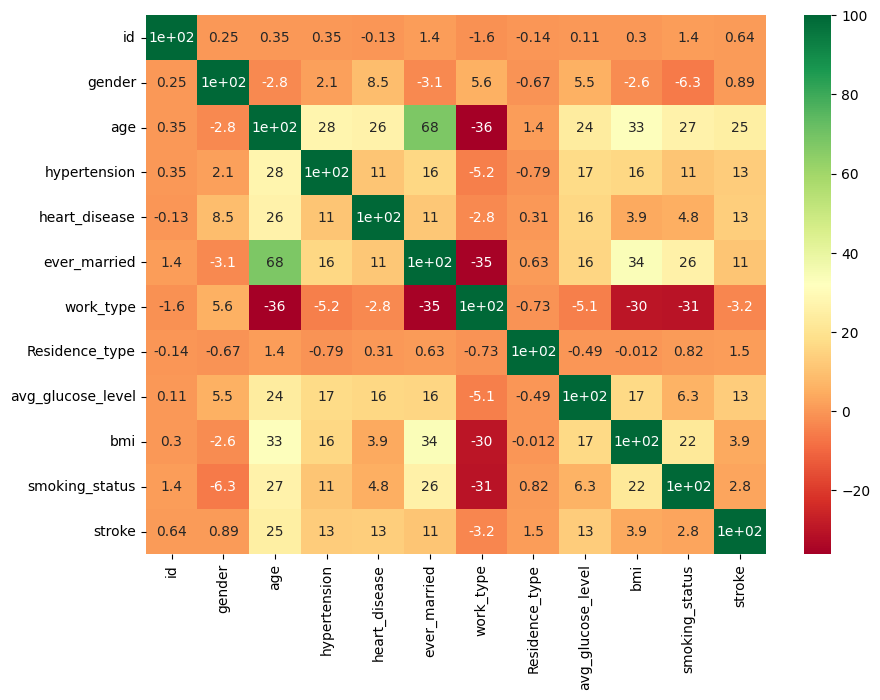

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(corr_metrix*100, annot = True, cmap='RdYlGn')

In [13]:
X = df.drop(['id','stroke'], axis=1)
y = df['stroke']
print(X.shape,y.shape)
X.head()

(5110, 10) (5110,)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=320)
print(X_train.shape,X_test.shape)

(4088, 10) (1022, 10)


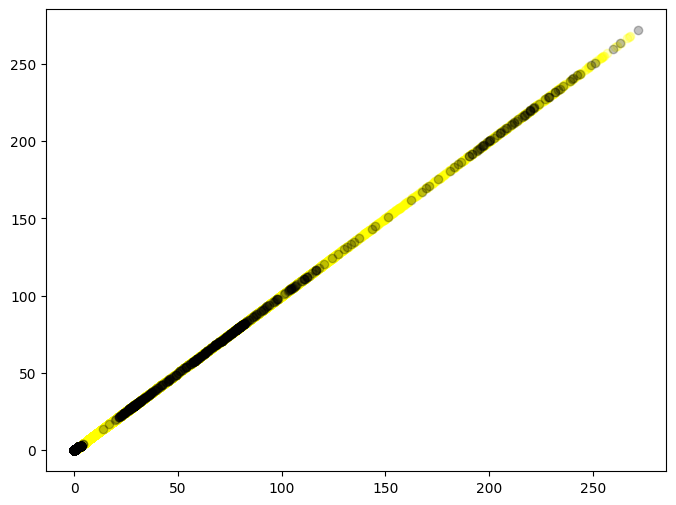

In [25]:
### Plotting
plt.figure(figsize=((8,6)))
plt.scatter(X_train[y_train == 0], X_train[y_train == 0], color = 'yellow', label = 'class1', alpha=0.25)
plt.scatter(X_train[y_train == 1], X_train[y_train == 1], color = 'black', label = 'class2', alpha=0.25)

In [19]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)

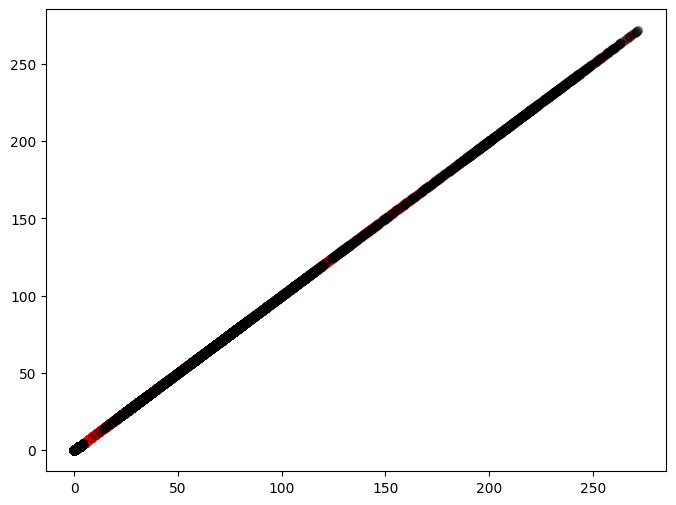

In [26]:
### Plotting
plt.figure(figsize=((8,6)))
plt.scatter(X_resampled_smt[y_resampled_smt == 0], X_resampled_smt[y_resampled_smt == 0], color = 'red', label = 'class1', alpha=0.25)
plt.scatter(X_resampled_smt[y_resampled_smt == 1], X_resampled_smt[y_resampled_smt == 1], color = 'black', label = 'class2', alpha=0.25)

In [29]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_resampled_smt,y_resampled_smt)

print('Train Acc -> ',lr.score(X_train,y_train)*100)
print('Test Acc -> ',lr.score(X_test,y_test)*100)

Train Acc ->  76.93248532289628
Test Acc ->  77.98434442270059


C:\Users\babun\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
### hyperparameter tuning
# penalty = ['l1', 'l2', 'elasticnet']
# C = [1,10,15,20]
# solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
# multi_class = ['auto', 'ovr', 'multinomial']

# params = {
    # 'penalty' : penalty,
    # 'C': C,
    # 'solver': solver
    # 'multi_class': multi_class
# }
# from sklearn.model_selection import GridSearchCV
# lr_grid = GridSearchCV(estimator=lr, param_grid=params, cv=5, n_jobs=-1)
# lr_grid.fit(X_train,y_train)
# print('Best Parameters -> ',lr_grid.best_params_)
# print('Best Parameters -> ',lr_grid.best_score_)

In [30]:
y_pred = lr.predict(X_test)
print(y_pred)

from sklearn.metrics import confusion_matrix, classification_report,mean_absolute_error,mean_squared_error
cm = confusion_matrix(y_test, y_pred)
cm

[1 0 0 ... 0 0 0]


array([[774, 208],
       [ 17,  23]], dtype=int64)

              precision    recall  f1-score   support

           0       0.98      0.79      0.87       982
           1       0.10      0.57      0.17        40

    accuracy                           0.78      1022
   macro avg       0.54      0.68      0.52      1022
weighted avg       0.94      0.78      0.85      1022



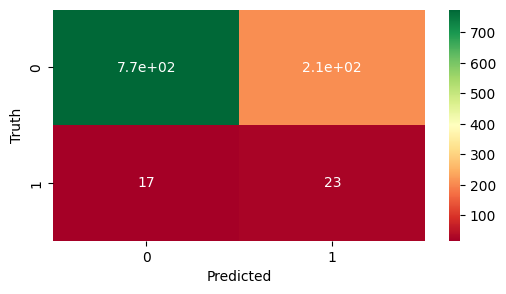

In [31]:
plt.figure(figsize=(6,3))
sns.heatmap(cm, annot=True, cmap='RdYlGn')
plt.xlabel('Predicted')
plt.ylabel('Truth')

print(classification_report(y_test, y_pred))

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('mae => ', mae)
print('mse => ', mse)
print('rmse => ', rmse)

mae =>  0.22015655577299412
mse =>  0.22015655577299412
rmse =>  0.4692084353173908
